Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3645 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3645 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-


Precisión del modelo: 91.64%
Exactitud del modelo: 89.72%
Recall del modelo: 88.25%
F1-score del modelo: 89.15%



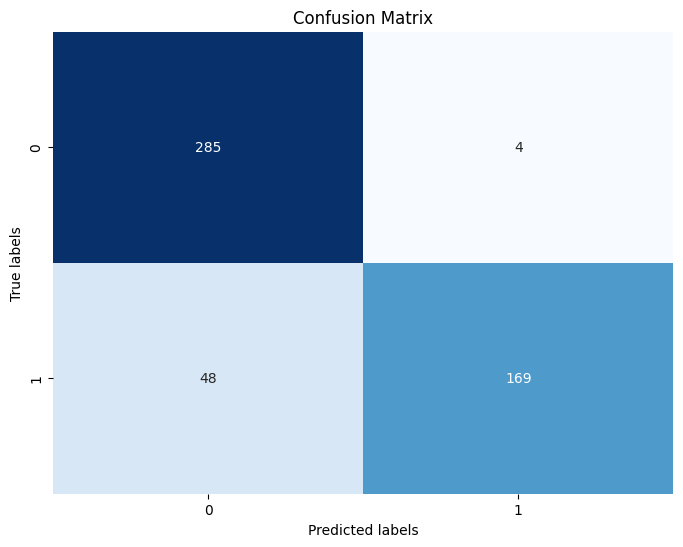


Mejores parámetros encontrados:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 20, 'metric': 'logloss', 'n_estimators': 20, 'objective': 'binary:logistic', 'subsample': 0.8}


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import pandas as pd
import os
# Obtener la ruta del directorio actual
ruta_actual = os.getcwd()
# Concatenar el nombre del archivo al final de la ruta actual
archivo = os.path.join(ruta_actual, 'Balanced_Data_Set.xlsx')
# Cargar datos
df = pd.read_excel(archivo)

# División de datos en características (X) y etiquetas (y)
X = df.drop('CONDUCTA', axis=1)
y = df['CONDUCTA']

# Convertir datos a matrices NumPy
X_np = np.array(X)
y_np = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'n_estimators': [20, 50, 100],
    'max_depth': [5, 20, 50],   
    'objective': ['binary:logistic', 'multi:softmax'],  # Función objetivo para XGBoost
    'metric': ['logloss']  # Métrica a optimizar
}

# Inicializar el clasificador XGBoost
xgb = XGBClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='precision', verbose=2, n_jobs=-1)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_xgb = grid_search.best_estimator_

# Realizar predicciones
predictions = best_xgb.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')

# Mostrar métricas
print(f'\nPrecisión del modelo: {precision * 100:.2f}%')
print(f'Exactitud del modelo: {accuracy * 100:.2f}%')
print(f'Recall del modelo: {recall * 100:.2f}%')
print(f'F1-score del modelo: {f1 * 100:.2f}%\n')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Mostrar los mejores parámetros encontrados
print("\nMejores parámetros encontrados:")
print(grid_search.best_params_)
